In [7]:
import math

In [4]:
import numpy as np
import pandas as pd
import xarray as xr

In [5]:
import matplotlib.pyplot as pp

`xarray`: http://xarray.pydata.org/en/stable/index.html

Need also

`h5netcdf`: https://github.com/shoyer/h5netcdf

In [431]:
def TimeSeries(array, t0=0, dt=1, units=None, name=None, ts=None):
    """Represent an equispaced LDC time series by way of an xarray.

    Args:
        array (numpy-like object): the data
        t0 (double or numpy.datetime64): time of first sample (in seconds if given as double)
        dt (double or numpy.timedelta64): sample cadence (in seconds if given as double)
        units (str): physical units (MKS + LDC additions) 
        
    Returns:
        xarray.DataArray: the wrapped and annotated data
        
    TODO:
        accept more meta data
    """

    # build the time axis or check the one that was provided
    if ts is None:
        ts = xr.DataArray(np.arange(t0, t0 + len(array) * dt, dt), dims=('t'))
    else:
        assert (ts[0] == t0) and (ts[1] - ts[0] == dt)
        ts = xr.DataArray(ts, dims=('t'))
    
    # if the time axis is numeric, give it units of second
    if not np.issubdtype(ts.dtype, np.datetime64):
        ts.attrs['units'] = 's'
        
    return xr.DataArray(array, dims=('t'), coords={'t': ts},
                        name=name, attrs={'units': units, 't0': t0, 'dt': dt})

In [423]:
t = np.linspace(0,8,1000)

s = np.sin(2 * math.pi * (t + 0.1 * t**2))
c = np.cos(2 * math.pi * (t + 0.1 * t**2))

In [440]:
hp = TimeSeries(s, name='hp', units='strain')
hc = TimeSeries(c, name='hc', units='strain')

In [441]:
hp

<xarray.DataArray 'hp' (t: 1000)>
array([ 0.        ,  0.05033481,  0.10062219,  0.15073332,  0.20053882,
        0.24990904,  0.29871447,  0.34682601,  0.39411539,  0.44045544,
        0.48572053,  0.52978685,  0.5725328 ,  0.61383935,  0.65359035,
        0.69167292,  0.72797779,  0.76239958,  0.79483722,  0.8251942 ,
        0.85337892,  0.879305  ,  0.90289157,  0.92406353,  0.94275185,
        0.95889384,  0.97243336,  0.98332106,  0.9915146 ,  0.99697885,
        0.99968605,  0.99961597,  0.99675606,  0.99110157,  0.98265562,
        0.97142931,  0.95744175,  0.94072009,  0.92129953,  0.89922333,
        0.8745427 ,  0.84731682,  0.81761267,  0.78550498,  0.75107605,
        0.71441559,  0.67562055,  0.6347949 ,  0.59204937,  0.54750122,
        0.50127393,  0.45349693,  0.40430521,  0.35383903,  0.30224351,
        0.24966824,  0.19626691,  0.1421968 ,  0.08761844,  0.03269503,
       -0.02240792, -0.07752318, -0.13248223, -0.18711582, -0.24125446,
       -0.29472896, -0.34737098, -0.39901356, -0.44949162, -0.49864258,
       -0.54630686, -0.59232839, -0.63655521, -0.67883995, -0.71904037,
       -0.75701986, -0.79264794, -0.82580076, -0.85636153, -0.88422103,
       -0.909278  , -0.93143954, -0.95062154, -0.96674902, -0.97975646,
       -0.98958815, -0.99619841, -0.99955191, -0.99962383, -0.99640008,
       -0.98987745, -0.98006371, -0.96697773, -0.95064947, -0.93112004,
       -0.90844163, -0.88267745, -0.85390163, -0.82219908, -0.78766527,
       -0.75040604, -0.7105373 , -0.66818474, -0.62348351, -0.5765778 ,
       -0.52762044, -0.47677245, -0.42420257, -0.3700867 , -0.31460736,
       -0.25795312, -0.200318  , -0.14190079, -0.0829044 , -0.02353519,
        0.03599773,  0.09548329,  0.15470913,  0.21346238,  0.27153047,
        0.32870183,  0.38476674,  0.43951807,  0.49275209,  0.54426924,
        0.59387491,  0.64138019,  0.68660264,  0.72936703,  0.76950604,
        0.806861  ,  0.84128251,  0.87263112,  0.90077794,  0.92560523,
        0.94700694,  0.96488923,  0.97917092,  0.98978395,  0.99667371,
        0.99979944,  0.99913444,  0.99466637,  0.98639738,  0.97434425,
        0.95853847,  0.93902624,  0.91586842,  0.88914043,  0.85893211,
        0.82534744,  0.78850431,  0.74853418,  0.70558163,  0.65980398,
        0.6113707 ,  0.56046292,  0.50727274,  0.4520026 ,  0.39486457,
        0.33607953,  0.2758764 ,  0.21449127,  0.15216652,  0.08914985,
        0.02569336, -0.03794746, -0.10151475, -0.16474931, -0.22739169,
       -0.28918319, -0.34986702, -0.40918933, -0.46690029, -0.5227552 ,
       -0.57651555, -0.62795006, -0.67683572, -0.72295881, -0.76611587,
       -0.80611467, -0.84277511, -0.87593011, -0.9054264 , -0.93112532,
       -0.95290357, -0.9706538 , -0.98428528, -0.9937244 , -0.99891513,
       -0.99981946, -0.99641767, -0.98870859, -0.97670977, -0.96045756,
       -0.94000714, -0.91543237, -0.88682569, -0.85429784, -0.81797754,
       -0.77801103, -0.73456165, -0.68780916, -0.63794915, -0.58519226,
       -0.52976335, -0.47190066, -0.41185478, -0.34988767, -0.28627153,
       -0.22128769, -0.15522536, -0.0883804 , -0.02105402,  0.04644859,
        0.11381957,  0.18074987,  0.24693058,  0.31205444,  0.37581723,
        0.43791925,  0.49806674,  0.55597328,  0.61136123,  0.66396312,
        0.71352294,  0.75979748,  0.80255759,  0.84158937,  0.87669532,
        0.90769541,  0.9344281 ,  0.95675125,  0.97454295,  0.9877023 ,
        0.99615005,  0.99982919,  0.99870534,  0.99276717,  0.98202663,
        0.96651904,  0.94630315,  0.92146103,  0.89209785,  0.85834155,
        0.82034239,  0.77827241,  0.73232473,  0.68271276,  0.6296693 ,
        0.57344557,  0.51431003,  0.45254726,  0.38845659,  0.32235074,
        0.25455435,  0.18540241,  0.11523868,  0.04441401, -0.02671544,
       -0.09778992, -0.16844791, -0.23832799, -0.30707067, -0.37432025,
       -0.43972673, -0.5029476 , -0.56364973, -0.62151115, -0.6762228 ,
       -0.72749028, -0.77503548, -0.81859817, -0.8579375 , -0.89283344,
      

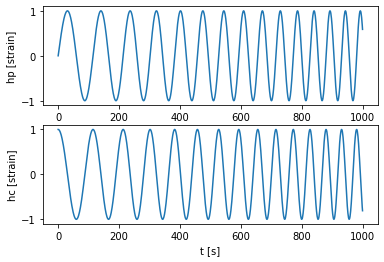

In [442]:
pp.subplot(2,1,1); hp.plot()
pp.subplot(2,1,2); hc.plot()

In [443]:
hp2 = TimeSeries(s, t0=np.datetime64('2030-01-01 00:00:00'), dt=10,
                 name='hp', units='strain')

In [452]:
hp2.attrs['t0']

numpy.datetime64('2030-01-01T00:00:00')

In [450]:
hp2.coords['t'].values[10]

numpy.datetime64('2030-01-01T00:01:40.000000000')

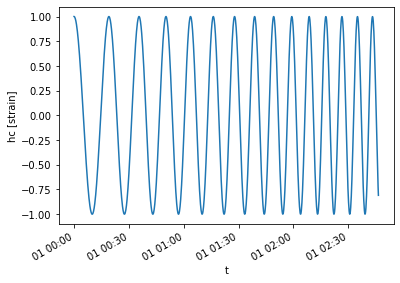

In [261]:
tt.plot()

In [461]:
def FrequencySeries(array, df=0, kmin=0, t0=0, units=None, name=None):
    """Represent a frequency-domain LDC signal by way of an xarray.

    Args:
        array (numpy-like object): the data
        df (double): frequency spacing (in Hertz)
        kmin: the index of the first sample (so that its frequency is (kmin * df) Hertz)
        t0 (double or numpy.datetime64): time offset of the signal (in seconds if given as double)
        units (str): physical units of the corresponding TimeSeries (MKS + LDC additions)
        
    Returns:
        xarray.DataArray: the wrapped and annotated data
        
    TODO:
        accept more metadata
        use the actual FFT units
    """

    # build the frequency axis
    fs = xr.DataArray(df * np.arange(kmin, kmin + len(array)), dims=('f'), attrs={'units': '1/s'})
            
    return xr.DataArray(array, dims=('f'), coords={'f': fs},
                        name=name, attrs={'units': units, 'df': df, 'kmin': kmin, 't0': t0})

In [481]:
@xr.register_dataarray_accessor('ts')
class TimeSeriesAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
 
    def fft(self):
        """Obtain the frequency-domain FrequencySeries representation of a TimeSeries.        
        """
        
        array = self._obj
        t0, dt, units = array.attrs['t0'], array.attrs['dt'], array.attrs['units']     
        
        return FrequencySeries(np.fft.rfft(array),
                               df=1.0/(dt * len(array)), kmin=0, t0=t0,
                               units=units, name=array.name)
    
    def ifft(self, dt=None):
        """Obtain the real-space TimeSeries representation of a FrequencySeries.
                
        Args:
            dt (double): TimeSeries cadence (defaults to 0.5 / highest f represented in FrequencySeries)
        """
        
        array = self._obj
        df, kmin, t0, units = array.attrs['df'], array.attrs['kmin'], array.attrs['t0'], array.attrs['units']

        if dt is None:
            n = 2 * (kmin + len(array) - 1)
            dt = 1 / df / n
        else:
            n = int(1.0 / (dt * df))
            
        # pad the array if needed
        padded = np.zeros(int(n/2 + 1), dtype=array.dtype)
        padded[kmin:(kmin + len(array))] = array.values[:]

        return TimeSeries(np.fft.irfft(padded),
                          t0=t0, dt=dt,
                          units=units, name=array.name)

/Users/vallis/anaconda3/envs/lisa/lib/python3.7/site-packages/ipykernel_launcher.py:1: AccessorRegistrationWarning: registration of accessor <class '__main__.TimeSeriesAccessor'> under name 'ts' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  """Entry point for launching an IPython kernel.


In [492]:
hp = TimeSeries(s, name='hp', units='strain')
fhp = hp.ts.fft()

In [493]:
fhp

<xarray.DataArray 'hp' (f: 501)>
array([  26.25948811+0.00000000e+00j,   26.57583434-4.20776562e-01j,
         27.5758924 -9.20241735e-01j,   29.42931014-1.62600438e+00j,
         32.47668743-2.81184672e+00j,   37.30687542-5.14807622e+00j,
         44.7145613 -1.03615296e+01j,   54.73743507-2.27298098e+01j,
         61.9103633 -5.07142272e+01j,   42.6040511 -9.97763941e+01j,
        -45.21730061-1.30184394e+02j, -149.05129159-2.11884031e+01j,
         -8.86838505+1.38437970e+02j,  113.40211022-8.23306890e+01j,
       -135.78985204+1.74428345e+01j,  142.3262414 -3.25049929e+01j,
        -96.12452459+8.48256469e+01j,  -11.37694389-1.47985670e+02j,
        155.52998429-3.03330063e+01j,   92.93550553+9.57325430e+01j,
          8.08945055+9.69383513e+01j,  -24.45097763+6.23660280e+01j,
        -28.31902341+3.66591603e+01j,  -24.40426338+2.26594801e+01j,
        -19.91419227+1.53878125e+01j,  -16.33071394+1.14093842e+01j,
        -13.65076667+9.04195258e+00j,  -11.64033887+7.51126990e+00j,
        -10.09960779+6.45007312e+00j,   -8.88977674+5.67264418e+00j,
         -7.91811353+5.07813179e+00j,   -7.12224607+4.60798061e+00j,
         -6.45933014+4.22614265e+00j,   -5.89919996+3.90929358e+00j,
         -5.42009297+3.64169594e+00j,   -5.00595039+3.41234966e+00j,
         -4.64467788+3.21333252e+00j,   -4.32699873+3.03879135e+00j,
         -4.04568042+2.88430549e+00j,   -3.79500145+2.74647183e+00j,
         -3.57037628+2.62262643e+00j,   -3.36808661+2.51065300e+00j,
         -3.18508541+2.40884814e+00j,   -3.01885186+2.31582469e+00j,
         -2.86728238+2.23044103e+00j,   -2.72860773+2.15174868e+00j,
         -2.60132911+2.07895276e+00j,   -2.48416841+2.01138187e+00j,
         -2.37602912+1.94846481e+00j,   -2.27596521+1.88971236e+00j,
         -2.18315627+1.83470298e+00j,   -2.09688738+1.78307137e+00j,
         -2.01653274+1.73449929e+00j,   -1.94154232+1.68870817e+00j,
         -1.87143073+1.64545301e+00j,   -1.80576811+1.60451745e+00j,
         -1.74417242+1.56570964e+00j,   -1.68630306+1.52885881e+00j,
         -1.63185544+1.49381246e+00j,   -1.58055636+1.46043391e+00j,
         -1.53216015+1.42860029e+00j,   -1.48644531+1.39820081e+00j,
         -1.44321161+1.36913531e+00j,   -1.40227768+1.34131296e+00j,
         -1.36347885+1.31465124e+00j,   -1.32666527+1.28907494e+00j,
         -1.29170033+1.26451539e+00j,   -1.25845927+1.24090974e+00j,
         -1.22682789+1.21820037e+00j,   -1.19670152+1.19633431e+00j,
         -1.16798402+1.17526280e+00j,   -1.14058699+1.15494089e+00j,
         -1.11442899+1.13532701e+00j,   -1.08943489+1.11638272e+00j,
         -1.06553527+1.09807238e+00j,   -1.04266591+1.08036289e+00j,
         -1.02076732+1.06322350e+00j,   -0.99978433+1.04662555e+00j,
         -0.97966569+1.03054234e+00j,   -0.96036374+1.01494895e+00j,
         -0.94183413+9.99822054e-01j,   -0.92403553+9.85139854e-01j,
         -0.90692938+9.70881909e-01j,   -0.89047965+9.57029050e-01j,
         -0.87465268+9.43563272e-01j,   -0.85941696+9.30467651e-01j,
         -0.84474299+9.17726259e-01j,   -0.8306031 +9.05324094e-01j,
         -0.81697134+8.93247008e-01j,   -0.80382332+8.81481651e-01j,
         -0.79113612+8.70015411e-01j,   -0.77888821+8.58836364e-01j,
         -0.76705926+8.47933227e-01j,   -0.75563018+8.37295316e-01j,
         -0.74458292+8.26912502e-01j,   -0.73390048+8.16775181e-01j,
         -0.72356678+8.06874233e-01j,   -0.71356666+7.97200998e-01j,
         -0.70388575+7.87747242e-01j,   -0.69451047+7.78505132e-01j,
         -0.68542798+7.69467212e-01j,   -0.67662607+7.60626381e-01j,
         -0.66809322+7.51975871e-01j,   -0.65981845+7.43509225e-01j,
         -0.65179138+7.35220282e-01j,   -0.64400212+7.27103162e-01j,
         -0.63644131+7.19152243e-01j,   -0.62910002+7.11362154e-01j,
         -0.62196976+7.03727755e-01j,   -0.61504247+6.96244129e-01j,
         -0.60831045+6.88906568e-01j,   -0.60176638+6.81710562e-01j,
         -0.59540327+6.74651787e-01j,   -0.58921448+6.67726099e-01j,
         -0.58319365+6.60929521e-0

(0, 0.05, -164.28035538732763, 170.75904808461706)

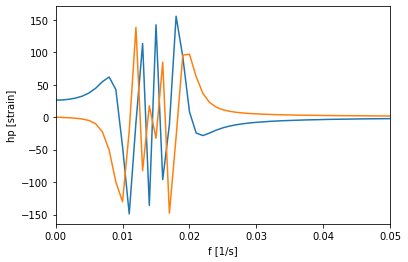

In [494]:
fhp.real.plot()
fhp.imag.plot()

pp.axis(xmin=0, xmax=0.05)

In [495]:
fhp.ts.ifft()

<xarray.DataArray 'hp' (t: 1000)>
array([ 0.        ,  0.05033481,  0.10062219,  0.15073332,  0.20053882,
        0.24990904,  0.29871447,  0.34682601,  0.39411539,  0.44045544,
        0.48572053,  0.52978685,  0.5725328 ,  0.61383935,  0.65359035,
        0.69167292,  0.72797779,  0.76239958,  0.79483722,  0.8251942 ,
        0.85337892,  0.879305  ,  0.90289157,  0.92406353,  0.94275185,
        0.95889384,  0.97243336,  0.98332106,  0.9915146 ,  0.99697885,
        0.99968605,  0.99961597,  0.99675606,  0.99110157,  0.98265562,
        0.97142931,  0.95744175,  0.94072009,  0.92129953,  0.89922333,
        0.8745427 ,  0.84731682,  0.81761267,  0.78550498,  0.75107605,
        0.71441559,  0.67562055,  0.6347949 ,  0.59204937,  0.54750122,
        0.50127393,  0.45349693,  0.40430521,  0.35383903,  0.30224351,
        0.24966824,  0.19626691,  0.1421968 ,  0.08761844,  0.03269503,
       -0.02240792, -0.07752318, -0.13248223, -0.18711582, -0.24125446,
       -0.29472896, -0.34737098, -0.39901356, -0.44949162, -0.49864258,
       -0.54630686, -0.59232839, -0.63655521, -0.67883995, -0.71904037,
       -0.75701986, -0.79264794, -0.82580076, -0.85636153, -0.88422103,
       -0.909278  , -0.93143954, -0.95062154, -0.96674902, -0.97975646,
       -0.98958815, -0.99619841, -0.99955191, -0.99962383, -0.99640008,
       -0.98987745, -0.98006371, -0.96697773, -0.95064947, -0.93112004,
       -0.90844163, -0.88267745, -0.85390163, -0.82219908, -0.78766527,
       -0.75040604, -0.7105373 , -0.66818474, -0.62348351, -0.5765778 ,
       -0.52762044, -0.47677245, -0.42420257, -0.3700867 , -0.31460736,
       -0.25795312, -0.200318  , -0.14190079, -0.0829044 , -0.02353519,
        0.03599773,  0.09548329,  0.15470913,  0.21346238,  0.27153047,
        0.32870183,  0.38476674,  0.43951807,  0.49275209,  0.54426924,
        0.59387491,  0.64138019,  0.68660264,  0.72936703,  0.76950604,
        0.806861  ,  0.84128251,  0.87263112,  0.90077794,  0.92560523,
        0.94700694,  0.96488923,  0.97917092,  0.98978395,  0.99667371,
        0.99979944,  0.99913444,  0.99466637,  0.98639738,  0.97434425,
        0.95853847,  0.93902624,  0.91586842,  0.88914043,  0.85893211,
        0.82534744,  0.78850431,  0.74853418,  0.70558163,  0.65980398,
        0.6113707 ,  0.56046292,  0.50727274,  0.4520026 ,  0.39486457,
        0.33607953,  0.2758764 ,  0.21449127,  0.15216652,  0.08914985,
        0.02569336, -0.03794746, -0.10151475, -0.16474931, -0.22739169,
       -0.28918319, -0.34986702, -0.40918933, -0.46690029, -0.5227552 ,
       -0.57651555, -0.62795006, -0.67683572, -0.72295881, -0.76611587,
       -0.80611467, -0.84277511, -0.87593011, -0.9054264 , -0.93112532,
       -0.95290357, -0.9706538 , -0.98428528, -0.9937244 , -0.99891513,
       -0.99981946, -0.99641767, -0.98870859, -0.97670977, -0.96045756,
       -0.94000714, -0.91543237, -0.88682569, -0.85429784, -0.81797754,
       -0.77801103, -0.73456165, -0.68780916, -0.63794915, -0.58519226,
       -0.52976335, -0.47190066, -0.41185478, -0.34988767, -0.28627153,
       -0.22128769, -0.15522536, -0.0883804 , -0.02105402,  0.04644859,
        0.11381957,  0.18074987,  0.24693058,  0.31205444,  0.37581723,
        0.43791925,  0.49806674,  0.55597328,  0.61136123,  0.66396312,
        0.71352294,  0.75979748,  0.80255759,  0.84158937,  0.87669532,
        0.90769541,  0.9344281 ,  0.95675125,  0.97454295,  0.9877023 ,
        0.99615005,  0.99982919,  0.99870534,  0.99276717,  0.98202663,
        0.96651904,  0.94630315,  0.92146103,  0.89209785,  0.85834155,
        0.82034239,  0.77827241,  0.73232473,  0.68271276,  0.6296693 ,
        0.57344557,  0.51431003,  0.45254726,  0.38845659,  0.32235074,
        0.25455435,  0.18540241,  0.11523868,  0.04441401, -0.02671544,
       -0.09778992, -0.16844791, -0.23832799, -0.30707067, -0.37432025,
       -0.43972673, -0.5029476 , -0.56364973, -0.62151115, -0.6762228 ,
       -0.72749028, -0.77503548, -0.81859817, -0.8579375 , -0.89283344,
      

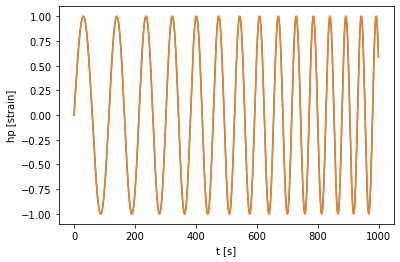

In [496]:
fhp.ts.ifft().plot()
hp.plot()

In [513]:
hp.to_netcdf('hp.h5', format='NETCDF4', engine='h5netcdf')

In [514]:
import h5py

In [515]:
h5 = h5py.File('hp.h5','r')

In [543]:
h5['hp']

<HDF5 dataset "hp": shape (1000,), type "<f8">

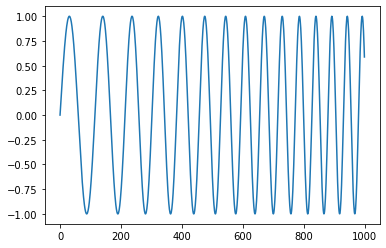

In [533]:
pp.plot(h5['hp'][()])

In [541]:
h5['hp'].attrs['dt']

1

In [545]:
xr.load_dataarray('hp.h5', engine='h5netcdf')

<xarray.DataArray 'hp' (t: 1000)>
array([ 0.        ,  0.05033481,  0.10062219,  0.15073332,  0.20053882,
        0.24990904,  0.29871447,  0.34682601,  0.39411539,  0.44045544,
        0.48572053,  0.52978685,  0.5725328 ,  0.61383935,  0.65359035,
        0.69167292,  0.72797779,  0.76239958,  0.79483722,  0.8251942 ,
        0.85337892,  0.879305  ,  0.90289157,  0.92406353,  0.94275185,
        0.95889384,  0.97243336,  0.98332106,  0.9915146 ,  0.99697885,
        0.99968605,  0.99961597,  0.99675606,  0.99110157,  0.98265562,
        0.97142931,  0.95744175,  0.94072009,  0.92129953,  0.89922333,
        0.8745427 ,  0.84731682,  0.81761267,  0.78550498,  0.75107605,
        0.71441559,  0.67562055,  0.6347949 ,  0.59204937,  0.54750122,
        0.50127393,  0.45349693,  0.40430521,  0.35383903,  0.30224351,
        0.24966824,  0.19626691,  0.1421968 ,  0.08761844,  0.03269503,
       -0.02240792, -0.07752318, -0.13248223, -0.18711582, -0.24125446,
       -0.29472896, -0.34737098, -0.39901356, -0.44949162, -0.49864258,
       -0.54630686, -0.59232839, -0.63655521, -0.67883995, -0.71904037,
       -0.75701986, -0.79264794, -0.82580076, -0.85636153, -0.88422103,
       -0.909278  , -0.93143954, -0.95062154, -0.96674902, -0.97975646,
       -0.98958815, -0.99619841, -0.99955191, -0.99962383, -0.99640008,
       -0.98987745, -0.98006371, -0.96697773, -0.95064947, -0.93112004,
       -0.90844163, -0.88267745, -0.85390163, -0.82219908, -0.78766527,
       -0.75040604, -0.7105373 , -0.66818474, -0.62348351, -0.5765778 ,
       -0.52762044, -0.47677245, -0.42420257, -0.3700867 , -0.31460736,
       -0.25795312, -0.200318  , -0.14190079, -0.0829044 , -0.02353519,
        0.03599773,  0.09548329,  0.15470913,  0.21346238,  0.27153047,
        0.32870183,  0.38476674,  0.43951807,  0.49275209,  0.54426924,
        0.59387491,  0.64138019,  0.68660264,  0.72936703,  0.76950604,
        0.806861  ,  0.84128251,  0.87263112,  0.90077794,  0.92560523,
        0.94700694,  0.96488923,  0.97917092,  0.98978395,  0.99667371,
        0.99979944,  0.99913444,  0.99466637,  0.98639738,  0.97434425,
        0.95853847,  0.93902624,  0.91586842,  0.88914043,  0.85893211,
        0.82534744,  0.78850431,  0.74853418,  0.70558163,  0.65980398,
        0.6113707 ,  0.56046292,  0.50727274,  0.4520026 ,  0.39486457,
        0.33607953,  0.2758764 ,  0.21449127,  0.15216652,  0.08914985,
        0.02569336, -0.03794746, -0.10151475, -0.16474931, -0.22739169,
       -0.28918319, -0.34986702, -0.40918933, -0.46690029, -0.5227552 ,
       -0.57651555, -0.62795006, -0.67683572, -0.72295881, -0.76611587,
       -0.80611467, -0.84277511, -0.87593011, -0.9054264 , -0.93112532,
       -0.95290357, -0.9706538 , -0.98428528, -0.9937244 , -0.99891513,
       -0.99981946, -0.99641767, -0.98870859, -0.97670977, -0.96045756,
       -0.94000714, -0.91543237, -0.88682569, -0.85429784, -0.81797754,
       -0.77801103, -0.73456165, -0.68780916, -0.63794915, -0.58519226,
       -0.52976335, -0.47190066, -0.41185478, -0.34988767, -0.28627153,
       -0.22128769, -0.15522536, -0.0883804 , -0.02105402,  0.04644859,
        0.11381957,  0.18074987,  0.24693058,  0.31205444,  0.37581723,
        0.43791925,  0.49806674,  0.55597328,  0.61136123,  0.66396312,
        0.71352294,  0.75979748,  0.80255759,  0.84158937,  0.87669532,
        0.90769541,  0.9344281 ,  0.95675125,  0.97454295,  0.9877023 ,
        0.99615005,  0.99982919,  0.99870534,  0.99276717,  0.98202663,
        0.96651904,  0.94630315,  0.92146103,  0.89209785,  0.85834155,
        0.82034239,  0.77827241,  0.73232473,  0.68271276,  0.6296693 ,
        0.57344557,  0.51431003,  0.45254726,  0.38845659,  0.32235074,
        0.25455435,  0.18540241,  0.11523868,  0.04441401, -0.02671544,
       -0.09778992, -0.16844791, -0.23832799, -0.30707067, -0.37432025,
       -0.43972673, -0.5029476 , -0.56364973, -0.62151115, -0.6762228 ,
       -0.72749028, -0.77503548, -0.81859817, -0.8579375 , -0.89283344,
      